# Pharmaceutical Sales prediction across multiple stores
## Exploratory Data Analysis (EDA)

In [1]:
# libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# IMPORTING DATA 
raw_store_data=pd.read_csv('data/store.csv', )
raw_train_data=pd.read_csv('data/train.csv', low_memory=False, parse_dates=True)
raw_test_data=pd.read_csv('data/test.csv',  low_memory=False, parse_dates=True)
raw_sample_submission_data=pd.read_csv('data/sample_submission.csv')

#### COPYING OUR DATA TO NEW DATAFRAMES TO USE IN OUR EDA

In [3]:
df_sample = raw_sample_submission_data.copy()
print(f" There are {df_sample.shape[0]} rows and {df_sample.shape[1]} columns in sample dataframe")
df_sample.head()

 There are 41088 rows and 2 columns in sample dataframe


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
df_test = raw_test_data.copy()
print(f" There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in test dataframe")
df_test.head()


 There are 41088 rows and 8 columns in test dataframe


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
df_train = raw_train_data.copy()
print(f" There are {df_train.shape[0]} rows and {df_train.shape[1]} columns train dataframe")
df_train.head()

 There are 1017209 rows and 9 columns train dataframe


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df_store = raw_store_data.copy()
print(f" There are {df_store.shape[0]} rows and {df_store.shape[1]} columns store dataframe ")
df_store.head()

 There are 1115 rows and 10 columns store dataframe 


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### detecting missing values in our datasets 

In [7]:
# function of finding all missing values
def missing_per_column(df):
    print(round(df.isna().sum()))

In [8]:
missing_per_column(df_sample)

Id       0
Sales    0
dtype: int64


In [9]:
missing_per_column(df_store)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [10]:
missing_per_column(df_train)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [11]:
missing_per_column(df_test)

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


#### filling missing values  in test and store dataframes 

In [12]:
df_test['Open'].unique()

array([ 1., nan,  0.])

In [13]:
# we fill the nan with 1 because a store being open can not  affect our data instead of setting it to 0 
# you might find a closed shop while sales were sold from a closed store 
df_test.fillna(1, inplace=True)
missing_per_column(df_test)

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [14]:
df_store['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [15]:
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [16]:
df_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [17]:
df_store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [18]:
df_store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [19]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [20]:
# filling the NaN values in CompetitionDistance col
df_store.CompetitionDistance.fillna(df_store.CompetitionDistance.median(), inplace=True)

In [21]:
# replace all the other NaN values with zeros
df_store.fillna(0, inplace=True)
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### changing date datype to datetime 

In [22]:
df_train['Date'] = pd.to_datetime(df_train.Date)
df_test['Date'] = pd.to_datetime(df_test.Date)

#### finding if there is open store with no sales,closed store with no sales and closed store with  sales 

In [23]:
# closed stores with sales
not_open = df_train[(df_train['Open']==0) & (df_train['Sales'] !=0)]
not_open.shape
print(f" There are {not_open.shape[0]} closed stores with sales")

 There are 0 closed stores with sales


In [24]:
# closed stores with no sales (TOTALY CLOSED )
closed_store = df_train[(df_train.Open == 0) & (df_train.Sales == 0)]
closed_store.shape
print(f" There are {closed_store.shape[0]} closed stores with no sales (TOTALY CLOSED )")

 There are 172817 closed stores with no sales (TOTALY CLOSED )


In [25]:
# Open stores with no sales
no_sales = df_train[(df_train['Open']==1) & (df_train['Sales'] <=0)]
no_sales.shape
print(f" There are {no_sales.shape[0]} Open stores with no sales")

 There are 54 Open stores with no sales


#### dropping all  Open stores with no sales and closed stores with no sales (TOTALY CLOSED )

In [26]:
# dropping the zero sales and closed stores
df_train = df_train[(df_train.Open != 0) & (df_train.Sales != 0)]
df_train.shape

(844338, 9)

#### Creating new features to be used 

In [31]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train.Date.dt.month
df_train['WeekOfYear'] = df_train.Date.dt.weekofyear
df_train['SalePerCustomer'] = df_train['Sales']/df_train['Customers']
df_train.head()
# df1['year'] = df1['timestamp'].dt.yea

<ipython-input-31-7cb0ab1e7e4d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOfYear'] = df_train.Date.dt.weekofyear


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,8.626118


#### merging store and train 

In [33]:
df_Train_Store = pd.merge(df_train, df_store, how='inner', on='Store')
print("The shape of the merged training and store dataset is: ", df_Train_Store.shape)
df_Train_Store.head()

The shape of the merged training and store dataset is:  (844338, 22)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [34]:
# missing values in our merged dataset
missing_per_column(df_Train_Store)

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
WeekOfYear                   0
SalePerCustomer              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [46]:
#  statistics of train Store 
df_Train_Store.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.000000,280.000000,558.00,837.000000,1115.000000
DayOfWeek,844338.0,3.520350,1.723712,1.000000,2.000000,3.00,5.000000,7.000000
Sales,844338.0,6955.959134,3103.815515,46.000000,4859.000000,6369.00,8360.000000,41551.000000
Customers,844338.0,762.777166,401.194153,8.000000,519.000000,676.00,893.000000,7388.000000
Open,844338.0,1.000000,0.000000,1.000000,1.000000,1.00,1.000000,1.000000
Promo,844338.0,0.446356,0.497114,0.000000,0.000000,0.00,1.000000,1.000000
SchoolHoliday,844338.0,0.193578,0.395102,0.000000,0.000000,0.00,0.000000,1.000000
Year,844338.0,2013.831945,0.777271,2013.000000,2013.000000,2014.00,2014.000000,2015.000000
Month,844338.0,5.845774,3.323959,1.000000,3.000000,6.00,8.000000,12.000000
WeekOfYear,844338.0,23.646946,14.389931,1.000000,11.000000,23.00,35.000000,52.000000


In [38]:
#  total sum of Sales and Customers for each store type
a=df_Train_Store.groupby('StoreType')['Customers', 'Sales'].sum()
a.head()

<ipython-input-38-84526b281e53>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df_Train_Store.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Text(0.5, 0, 'store  type')

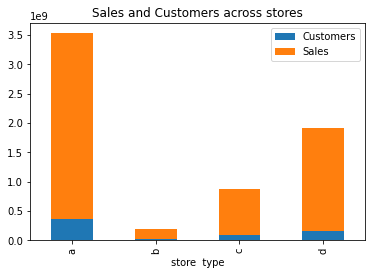

In [44]:
a.plot(kind='bar', stacked=True)
plt.title("Sales and Customers across stores")
plt.xlabel("store  type")


Text(0.5, 1.0, 'no of customers across diffrent StoreType')

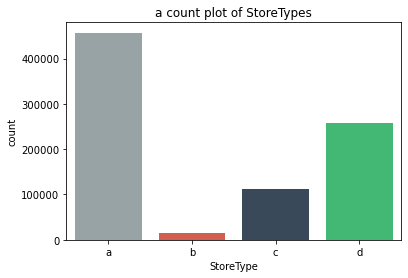

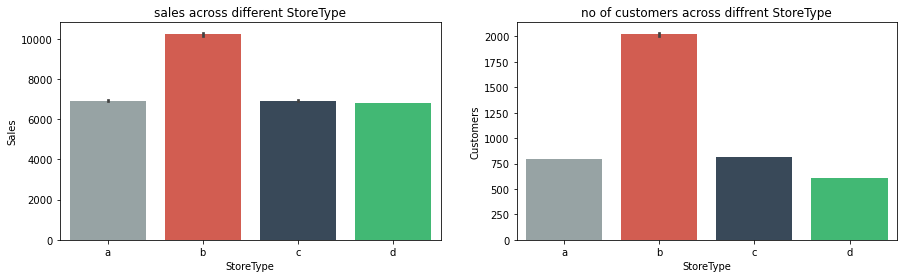

In [41]:
# store type
sns.countplot(x='StoreType', data=df_Train_Store, order=['a','b','c', 'd'], palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('a count plot of StoreTypes')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df_Train_Store, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df_Train_Store, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('no of customers across diffrent StoreType')

store type b is the least popular while a is the most popular. but b's sales are higher compared to the rest.

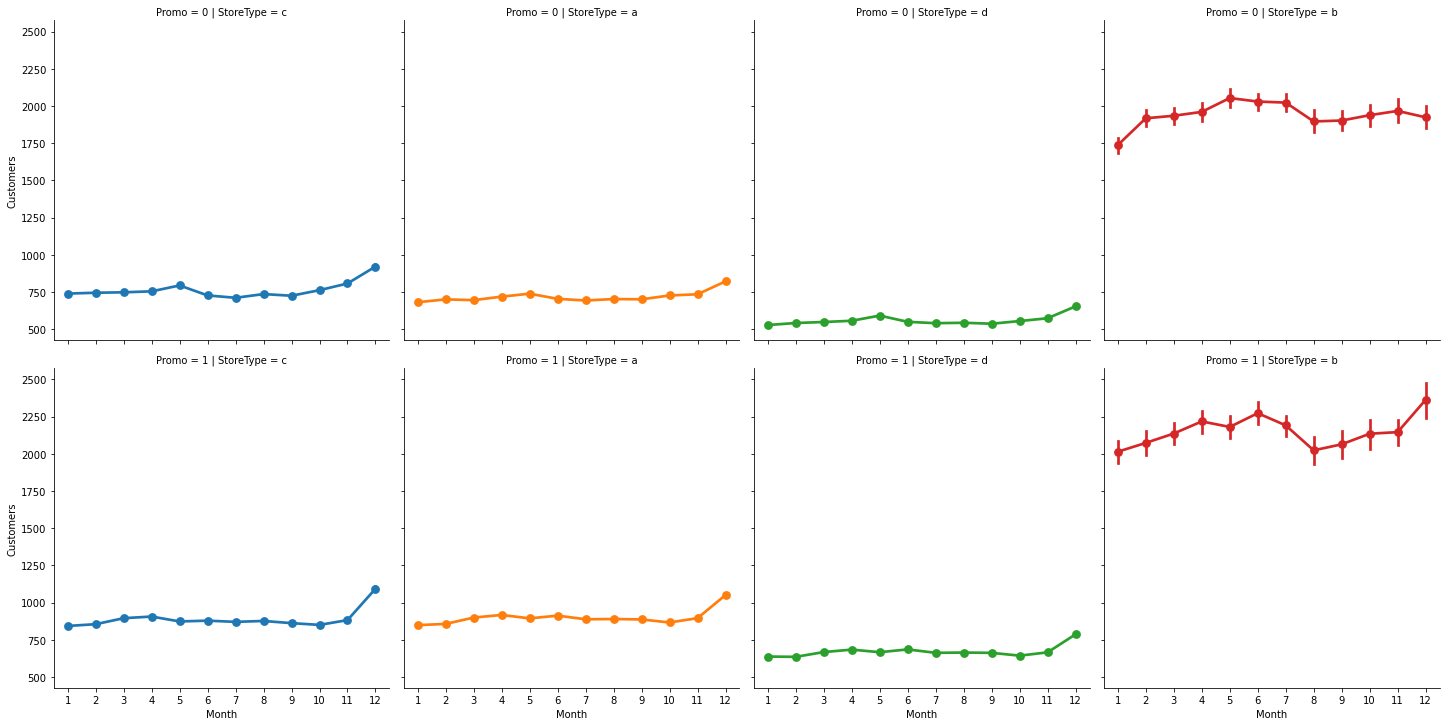

In [50]:
# ploting the montly data of the number Customers when there is a promo and when there isn't one
sns.catplot(y='Customers', x='Month', data=df_Train_Store, kind='point',
            col='StoreType', row='Promo', hue='StoreType')

In [51]:
df_Train_Store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

#### Correlation

top 6 features with highest correlation with sales


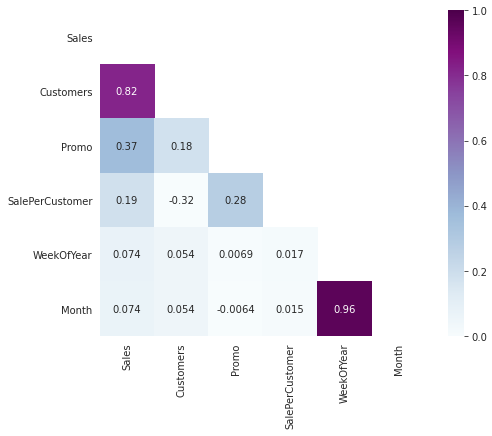

In [52]:
def correlation_map(f_data, f_feature, f_number):
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(8, 6))
        f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                           annot=True, annot_kws={"size": 10}, cmap="BuPu")

    plt.show()

print('top 6 features with highest correlation with sales')
correlation_map(df_Train_Store, 'Sales', 6)

#### promo affecting sales

Sales and Customers have a high correlation. In the follow up plots

Text(0.5, 1.0, 'customers across different Promo')

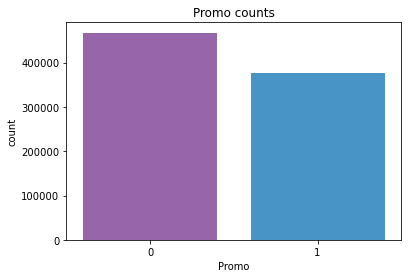

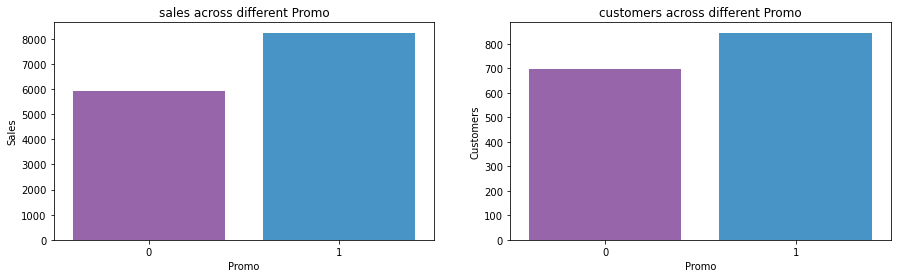

In [54]:
#Promo
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(x='Promo', data=df_Train_Store, palette = flatui).set_title('Promo counts')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=df_Train_Store, palette = flatui, ax=axis1).set_title('sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=df_Train_Store, ax=axis2,  palette = flatui).set_title('customers across different Promo')